# Аппроксимация методом наименьших квадратов.

Рассмотрим функцию $y = f(x)$ определенной набором значений $y_0, y_1, \cdots, y_n$ в точках $x_0, x_1, \cdots, x_n$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

## I Найдите многочлен наилучшего приближения.

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

используйте линейный метод наименьших квадратов. С его помощью

1. реализуйте алгоритм, создающий  "design matrix", используя $1, x, \cdots, x^m$ в качестве базисных функций.

2. постройте явно нормальную систему уравнений задачи наименьших квадратов при фиксированных значениях $m$.

3. решите систему уравнений, чтобы найти коэффициенты $P_m(x)$ для $m = 0, 1, 2, \dots$. Для решения задач линейной алгебры можете использовать либо библиотечные функции (`numpy.linalg.solve`), либо Вашу реализацию LU - разложение из 1 недели.

(33% итоговой оценки)

In [10]:
Design_matrix = np.zeros((14, m), dtype=float)
for i in range(14):
    for j in range(m):
        Design_matrix[i][j] = x1[i] ** j

## II 

Чтобы найти оптимальное значение $m$, используйти следующий критерий: возьмем $m=0, 1, 2, \dots$, для каждого значения $m$ вычислим

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

и возьмем такое значение $m$, при котором $\sigma_m$ стабилизируется или начинает расти.

(33% итоговой оценки)

In [24]:
def P(x, pow_):
    P = 0
    for i in range(pow_ + 1):
        P += x ** pow_
    return P


def get_sigma(m):
    sum_ = 0
    for i in range(len(y)):
        sum_ += (P(x[i], m) - y[i])**2
    return sum_/(len(y) - m)
    

m_sigma = 0
sigma = 0
sigma_prev = 1
m_ = []

while sigma_prev >= sigma and m_sigma < len(y) - 1:
    m_sigma += 1
    sigma_last = sigma
    sigma = get_sigma(m_sigma)
    m_.append(m_sigma)

Постройте ваши полиномы $P_m(x)$ вместе с данными. Визуально сравните полиномы различных степеней. Согласуется ли визуальное сравнение с ожидаемым оптимальным значением $m$?

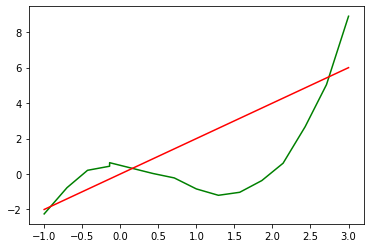

In [25]:
plt.plot(x1, y1, color='g')
for m in m_:
    p_m = [P(x_, m) for x_ in x]
    plt.plot(x1, p_m, color='r')
    plt.show()

## III. МНК с использовнием QR - разложениея.

Для оптимального значения $m$ из предыдущей части решите задачу МНК, используя безматричную реализацию QR - разложения. Для решения задач линейной алгебры можете использовать библиотечные функции (обратите внимание на `numpy.linalg.solve`, `numpy.linalg.qr` и т.д.) или код предыдущих недель.
Сравните результат с ответом, полученным при решении системы уравнений.

(33% итоговой оценки)

4
[11.86    -8.302    2.19291 -0.03254]
[[  15.        14.73      37.8203    83.51262]
 [  14.73      37.8203    83.51262  214.15354]
 [  37.8203    83.51262  214.15354  554.16202]
 [  83.51262  214.15354  554.16202 1490.29794]]
4 [ 1.97124 -1.60785 -0.60493  0.3455 ]


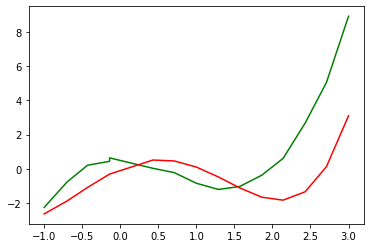

In [46]:
m = int(input())
coefs = np.zeros(m)
for i in range(m):
    coefs[i] = sum((x1[i] ** i) * yi for yi in y1)

matrix = np.zeros((m, m), dtype=float)
for i in range(m):
    for j in range(m):
        matrix[i][j] = sum(xi**(i+j) for xi in x1)

sol = np.linalg.solve(matrix, coefs)
print(sol)

p_m = np.zeros(15)
for i in range(15):
    for j in range(m):
        p_m[i] += (x1[i] ** (j + 1)) * sol[j]

plt.plot(x1, y1, color='g')
plt.plot(x1, p_m, color='r')
plt.show()